## Importing required libraries

In [156]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import regex as re
import nltk



## Loading the datasets using Pandas

In [157]:
#Primary Dataset
primary_data = pd.read_csv("newyork_stance_combined.csv")

#Secondary Dataset
secondary_data= pd.read_csv("reddit.final_st_0.csv")

In [158]:
primary_data.shape, secondary_data.shape

((576, 2), (288, 2))

In [159]:
primary_data.head()

,text,label
0,What do you mean that the pandemic has stretch...,unclear
1,I’m not sure if it qualifies as Big Brother wh...,unclear
2,What if smallpox and polio came roaring back o...,pro-mitigation
3,"I'm continuing to wear a mask. Even in bed, s...",pro-mitigation
4,"Although my husband and I really, really miss ...",pro-mitigation


In [160]:
#Dropna
primary_data =primary_data.dropna()
secondary_data =secondary_data.dropna()

In [161]:
primary_data.shape, secondary_data.shape

((576, 2), (288, 2))

In [162]:
# Removing missing values from primary and secondary_data
primary_data = primary_data.loc[primary_data["label"] != 'missing']
secondary_data = secondary_data.loc[secondary_data["label"] != 'missing']

In [163]:
primary_data.shape, secondary_data.shape

((576, 2), (288, 2))

## Cleaning Data (Removing URls from text)

In [164]:
primary_data['text'] = primary_data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)
secondary_data['text'] = secondary_data['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)

In [165]:
primary_data.to_csv("df_primary_v3.csv") ### CHECK

In [166]:
primary_data.head()

,text,label
0,What do you mean that the pandemic has stretch...,unclear
1,I’m not sure if it qualifies as Big Brother wh...,unclear
2,What if smallpox and polio came roaring back o...,pro-mitigation
3,"I'm continuing to wear a mask. Even in bed, s...",pro-mitigation
4,"Although my husband and I really, really miss ...",pro-mitigation


## Split Primary dataset into Train (70%) and Test(30%) and use the secondary dataset as a test set

In [167]:
# Split Primary dataset into Train (70%) and Test(30%)
primary_data_train, primary_data_test = train_test_split(primary_data, test_size=0.3)

# get labels from 2nd dataset
y2_test = secondary_data.label

# Get labels from train and test data
y_train = primary_data_train.label
y_test = primary_data_test.label


In [168]:
primary_data_train.head()

,text,label
329,"It's NYC - a densely populated place, where we...",pro-mitigation
149,Not discussed here is how economists estimate ...,unclear
458,If you don't want to get a Covid vaccine shot ...,pro-mitigation
392,Allow for opting out but it is a make it night...,pro-mitigation
513,"The CDC, presumably at the urging of the Biden...",pro-mitigation


In [169]:
y2_test.value_counts()

pro-mitigation     155
unclear            108
anti-mitigation     25
Name: label, dtype: int64

In [170]:
y_test.value_counts()

pro-mitigation     101
unclear             54
anti-mitigation     18
Name: label, dtype: int64

In [171]:
y2_test

0      pro-mitigation
1             unclear
2      pro-mitigation
3      pro-mitigation
4             unclear
            ...      
283           unclear
284    pro-mitigation
285    pro-mitigation
286           unclear
287    pro-mitigation
Name: label, Length: 288, dtype: object

## Use TFIDF vectorizer on the text from training and testing datasets

In [172]:
vectorizer = TfidfVectorizer(min_df=3, stop_words="english").fit(primary_data_train.text)
X_train = vectorizer.transform(primary_data_train.text)

X_test = vectorizer.transform(primary_data_test.text)

X2_test = vectorizer.transform(secondary_data.text)


In [173]:
print(X_train.shape)

print(X_test.shape)

print(X2_test.shape)

print(y_train.shape)

print(y_test.shape)

print(y2_test.shape)

(403, 1090)
(173, 1090)
(288, 1090)
(403,)
(173,)
(288,)


## ML Data Modelling 
Using differnet Machine Learning Classifiers - Logistic Regression, Naive Bayes, Random Forest, SVC and XGBClassifier

## Logistic Regression model (training)

In [174]:
lr_model = LogisticRegression(penalty="none",multi_class="multinomial",solver="lbfgs").fit(X_train, y_train)

# Predicting Test data from 1st dataset
y_hat_lr_test = lr_model.predict(X_test)

# Predicting Test data from Second Dataset
y_hat_secondary_dataset_test = lr_model.predict(X2_test)

### Logistic Regression Model performance metrics on Test data (Primary Dataset)

In [175]:
print(classification_report(y_test, y_hat_lr_test)) # 30%

                 precision    recall  f1-score   support

anti-mitigation       0.11      0.06      0.07        18
 pro-mitigation       0.67      0.55      0.61       101
        unclear       0.41      0.61      0.49        54

       accuracy                           0.52       173
      macro avg       0.40      0.41      0.39       173
   weighted avg       0.53      0.52      0.52       173



### Logistic Regression Model performance metrics on Test data (Secondary Dataset)

In [176]:
print(classification_report(y2_test,y_hat_secondary_dataset_test)) # secondary data

                 precision    recall  f1-score   support

anti-mitigation       0.17      0.08      0.11        25
 pro-mitigation       0.60      0.55      0.58       155
        unclear       0.45      0.56      0.50       108

       accuracy                           0.51       288
      macro avg       0.41      0.40      0.39       288
   weighted avg       0.51      0.51      0.51       288



## NaiveBayes model (training) and prediction on test data

In [177]:
nb_model =MultinomialNB().fit(X_train, y_train)
y_hat_nb_test = nb_model.predict(X_test)
y_hat_nb_secondary_dataset_test = nb_model.predict(X2_test)

### NB Model performance metrics on Test data (Primary Dataset)

In [178]:
print(classification_report(y_test, y_hat_nb_test)) # 30%

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        18
 pro-mitigation       0.59      0.92      0.72       101
        unclear       0.40      0.11      0.17        54

       accuracy                           0.57       173
      macro avg       0.33      0.34      0.30       173
   weighted avg       0.47      0.57      0.47       173



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### NB Model performance metrics on Test data (Secondary Dataset)

In [179]:
print(classification_report(y2_test,y_hat_nb_secondary_dataset_test)) # secondary data

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        25
 pro-mitigation       0.55      0.99      0.71       155
        unclear       0.75      0.08      0.15       108

       accuracy                           0.56       288
      macro avg       0.43      0.36      0.29       288
   weighted avg       0.58      0.56      0.44       288



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier training and prediction on test data

In [180]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_hat_rf_test = rf.predict(X_test)
y_hat_rf_secondary_dataset_test = rf.predict(X2_test)

### RF Model performance metrics on Test data (Primary Dataset)

In [182]:
print(classification_report(y_test, y_hat_rf_test)) # 30%

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        18
 pro-mitigation       0.65      0.67      0.66       101
        unclear       0.42      0.52      0.46        54

       accuracy                           0.55       173
      macro avg       0.36      0.40      0.38       173
   weighted avg       0.51      0.55      0.53       173



### RF Model performance metrics on Test data (Secondary Dataset)

In [183]:
print(classification_report(y2_test,y_hat_rf_secondary_dataset_test)) # secondary data

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        25
 pro-mitigation       0.67      0.71      0.69       155
        unclear       0.56      0.64      0.60       108

       accuracy                           0.62       288
      macro avg       0.41      0.45      0.43       288
   weighted avg       0.57      0.62      0.59       288



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
# SVC
svc_model = SVC().fit(X_train, y_train)
y_hat_svc_test = svc_model.predict(X_test)
y_hat_svc_secondary_dataset_test = svc_model.predict(X2_test)

In [185]:
print(classification_report(y_test, y_hat_svc_test)) # 30%

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        18
 pro-mitigation       0.59      0.81      0.68       101
        unclear       0.39      0.24      0.30        54

       accuracy                           0.55       173
      macro avg       0.33      0.35      0.33       173
   weighted avg       0.46      0.55      0.49       173



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
print(classification_report(y2_test,y_hat_svc_secondary_dataset_test)) # secondary data

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        25
 pro-mitigation       0.58      0.96      0.72       155
        unclear       0.72      0.19      0.31       108

       accuracy                           0.59       288
      macro avg       0.43      0.39      0.34       288
   weighted avg       0.58      0.59      0.50       288



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
y_hat_xgb_secondary_dataset_test

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1,
       1, 1])

In [188]:
y2_test

0      pro-mitigation
1             unclear
2      pro-mitigation
3      pro-mitigation
4             unclear
            ...      
283           unclear
284    pro-mitigation
285    pro-mitigation
286           unclear
287    pro-mitigation
Name: label, Length: 288, dtype: object

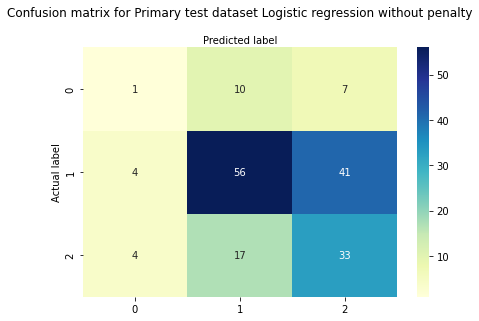

In [189]:
cnf_matrix_l1_primary_dataset = metrics.confusion_matrix(y_test, y_hat_lr_test)
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0, 1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_l1_primary_dataset),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset Logistic regression without penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Confusion matrix for Primary test dataset

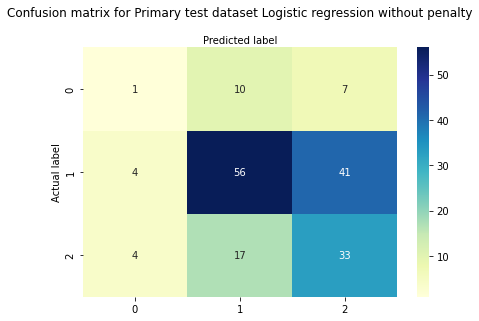

In [190]:
cnf_matrix_l1_primary_dataset = metrics.confusion_matrix(y_test, y_hat_lr_test)
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0, 1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_l1_primary_dataset),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset Logistic regression without penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Confusion matrix for Secondary test dataset

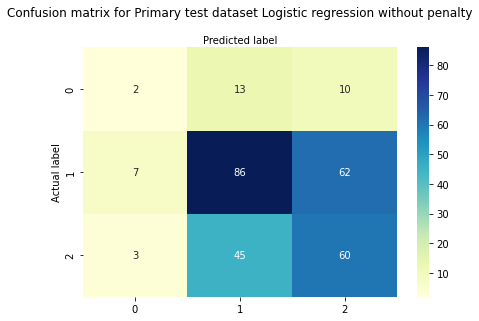

In [191]:
cnf_matrix_l1_secondary_dataset = metrics.confusion_matrix(y2_test, y_hat_secondary_dataset_test)
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0, 1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_l1_secondary_dataset),annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset Logistic regression without penalty', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


## Feature engineering

In [192]:
#Feature one is finding vax in the text like #Vaxxed #antiVax #vax #covidvax etc
def feature_function(text):
    return int(bool("vax" in text.lower()))
    #return int(bool(re.match(r"^([A-Z][a-z]+\s+){3}", text)))

#Feature two is finding vaccin in the text like vaccination, vaccine , vaccinated, #vaccinated , #vaccine, #covidVaccine, Vaccination drive etc
def feature_function2(text):
    # Flags texts that start with three capitalized words
    return int(bool("vaccin" in text.lower()))

#Feature three is finding immun in the text like immunity %, immunization, immune, covid vaccine immuntiy etc
def feature_function3(text):
    # Flags texts that start with three capitalized words
    return int(bool("immun" in text.lower()))

#Feature four is for finding words like phase 1 phase two trails etc in the text
def feature_function4(text):
    # Flags texts that start with three capitalized words
    #print(re.findall(r"(phase\s{0,1}([1-4] | (one | two | three | four))){1, 3}", text.lower(), flags=0))
    return int(bool(re.findall(r"(phase\s{0,1}([1-4]|(one|two|three|four))){1,3}(clinical trail|trails){0,1}", text.lower(), flags=0)))


# Applying the above features on the primary_data_train data set
new_feature_array1 = primary_data_train.text.apply(feature_function)
new_feature_array1_2 = primary_data_train.text.apply(feature_function2)
new_feature_array1_3 = primary_data_train.text.apply(feature_function3)
new_feature_array1_4 = primary_data_train.text.apply(feature_function4)

#Adding the new features to our training dataset
X_train_fin = np.insert(X_train.todense(), X_train.shape[1], new_feature_array1, axis=1)
X_train_fin = np.insert(X_train_fin, X_train_fin.shape[1], new_feature_array1_2, axis=1)
X_train_fin = np.insert(X_train_fin, X_train_fin.shape[1], new_feature_array1_3, axis=1)
X_train_fin = np.insert(X_train_fin, X_train_fin.shape[1], new_feature_array1_4, axis=1)

#Applying above features to our primary test data set
new_feature_array2 = primary_data_test.text.apply(feature_function2)
new_feature_array2_2 = primary_data_test.text.apply(feature_function2)
new_feature_array2_3 = primary_data_test.text.apply(feature_function3)
new_feature_array2_4 = primary_data_test.text.apply(feature_function4)

#Adding the new features to our primary test dataset
X_test_fin = np.insert(X_test.todense(), X_test.shape[1], new_feature_array2, axis=1)
X_test_fin = np.insert(X_test_fin, X_test_fin.shape[1], new_feature_array2_2, axis=1)
X_test_fin = np.insert(X_test_fin, X_test_fin.shape[1], new_feature_array2_3, axis=1)
X_test_fin = np.insert(X_test_fin, X_test_fin.shape[1], new_feature_array2_4, axis=1)

#Applying above features to our secondary test data set
new_feature_array3 = secondary_data.text.apply(feature_function)
new_feature_array3_2 = secondary_data.text.apply(feature_function2)
new_feature_array3_3 = secondary_data.text.apply(feature_function3)
new_feature_array3_4 = secondary_data.text.apply(feature_function4)

#Adding the new features to our secondary test dataset
X2_test_fin = np.insert(X2_test.todense(), X2_test.shape[1], new_feature_array3, axis=1)
X2_test_fin = np.insert(X2_test_fin, X2_test_fin.shape[1], new_feature_array3_2, axis=1)
X2_test_fin = np.insert(X2_test_fin, X2_test_fin.shape[1], new_feature_array3_3, axis=1)
X2_test_fin = np.insert(X2_test_fin, X2_test_fin.shape[1], new_feature_array3_4, axis=1)

#Checking the shapes of the training, testing datasets to see if new columns are added
print(X_train_fin.shape)
print(X_test_fin.shape)
print(X2_test_fin.shape)


(403, 1094)
(173, 1094)
(288, 1094)


# Random Forest Classifier Model Training after Feature Engineering

In [202]:
# rf with features
rf_model_with_features = RandomForestClassifier().fit(X_train_fin, y_train)
#print(lr2_model_with_features.coef_)
y_hat_rf_test_features = rf_model_with_features.predict(X_test_fin)

y2_hat_rf_test_features = rf_model_with_features.predict(X2_test_fin)

## RF Model performance metrics on feature engineering (Primary Dataset)

In [203]:
print(classification_report(y_test, y_hat_rf_test_features)) # 30%

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        18
 pro-mitigation       0.64      0.67      0.66       101
        unclear       0.42      0.50      0.45        54

       accuracy                           0.55       173
      macro avg       0.35      0.39      0.37       173
   weighted avg       0.50      0.55      0.53       173



## RF Model performance metrics on feature engineering (Secondary Dataset)

In [205]:
print(classification_report(y2_test,y2_hat_rf_test_features)) # secondary data

                 precision    recall  f1-score   support

anti-mitigation       0.00      0.00      0.00        25
 pro-mitigation       0.70      0.68      0.69       155
        unclear       0.56      0.71      0.63       108

       accuracy                           0.64       288
      macro avg       0.42      0.47      0.44       288
   weighted avg       0.59      0.64      0.61       288



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Creating Confusion Matrices for better visualization of results above

In [196]:
print("Secondary Dataset without features")
cnf_matrix_without_features_secondary_test_dataset = metrics.confusion_matrix(y2_test, y_hat_rf_secondary_dataset_test)
print(cnf_matrix_without_features_secondary_test_dataset)

print("Secondary Dataset with features")
cnf_matrix_with_features_secondary_test_dataset = metrics.confusion_matrix(
    y2_test, y2_hat_rf_test_features)
print(cnf_matrix_with_features_secondary_test_dataset)

print("\nPrimary Dataset without features")
cnf_matrix_without_features_primary_test_dataset = metrics.confusion_matrix(y_test, y_hat_rf_test)
print(cnf_matrix_without_features_primary_test_dataset)

print("Primary Dataset with features")
cnf_matrix_with_features_primary_test_dataset = metrics.confusion_matrix(y_test, y_hat_rf_test_features)
print(cnf_matrix_with_features_primary_test_dataset)



Secondary Dataset without features
[[  0  16   9]
 [  0 110  45]
 [  0  39  69]]
Secondary Dataset with features
[[  0  13  12]
 [  0 101  54]
 [  0  31  77]]

Primary Dataset without features
[[ 0 12  6]
 [ 0 68 33]
 [ 2 24 28]]
Primary Dataset with features
[[ 0 12  6]
 [ 0 68 33]
 [ 2 25 27]]


## Confusion matrix for Primary test dataset without features

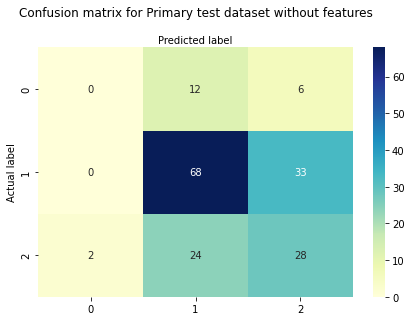

In [197]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks([0,1], label=class_names)
plt.yticks(tick_marks, label=class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_without_features_primary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset without features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Confusion matrix for Primary test dataset with features

Text(0.5, 257.44, 'Predicted label')

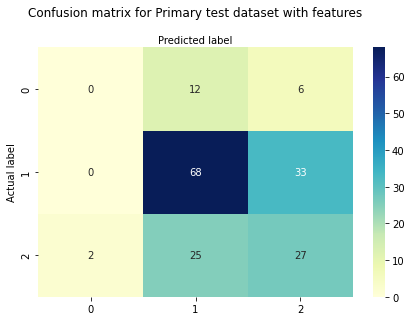

In [198]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_with_features_primary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Primary test dataset with features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Confusion matrix for Secondary test dataset without features

Text(0.5, 257.44, 'Predicted label')

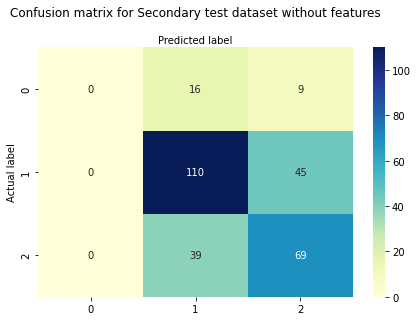

In [199]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_without_features_secondary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Secondary test dataset without features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## Confusion matrix for Secondary test dataset with features

Text(0.5, 257.44, 'Predicted label')

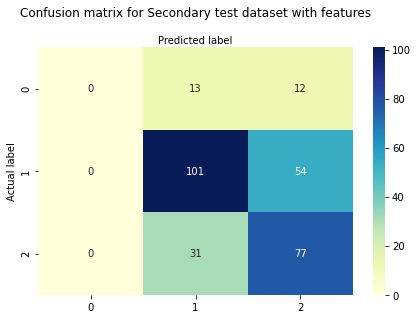

In [200]:
%matplotlib inline
class_names = ["False", "True"]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_with_features_secondary_test_dataset),
            annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Secondary test dataset with features', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Best Performing Model for New york and Reddit stance

### We are getting better accuracy on both primary and secondary data as 55% and 62% for Random Forest so for this dataset Random Forest is performing better than other classifiers